#### Import libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

Read the data

In [89]:
df = pd.read_csv('banknotes.csv')

In [90]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [91]:
df.shape

(1372, 5)

In [92]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

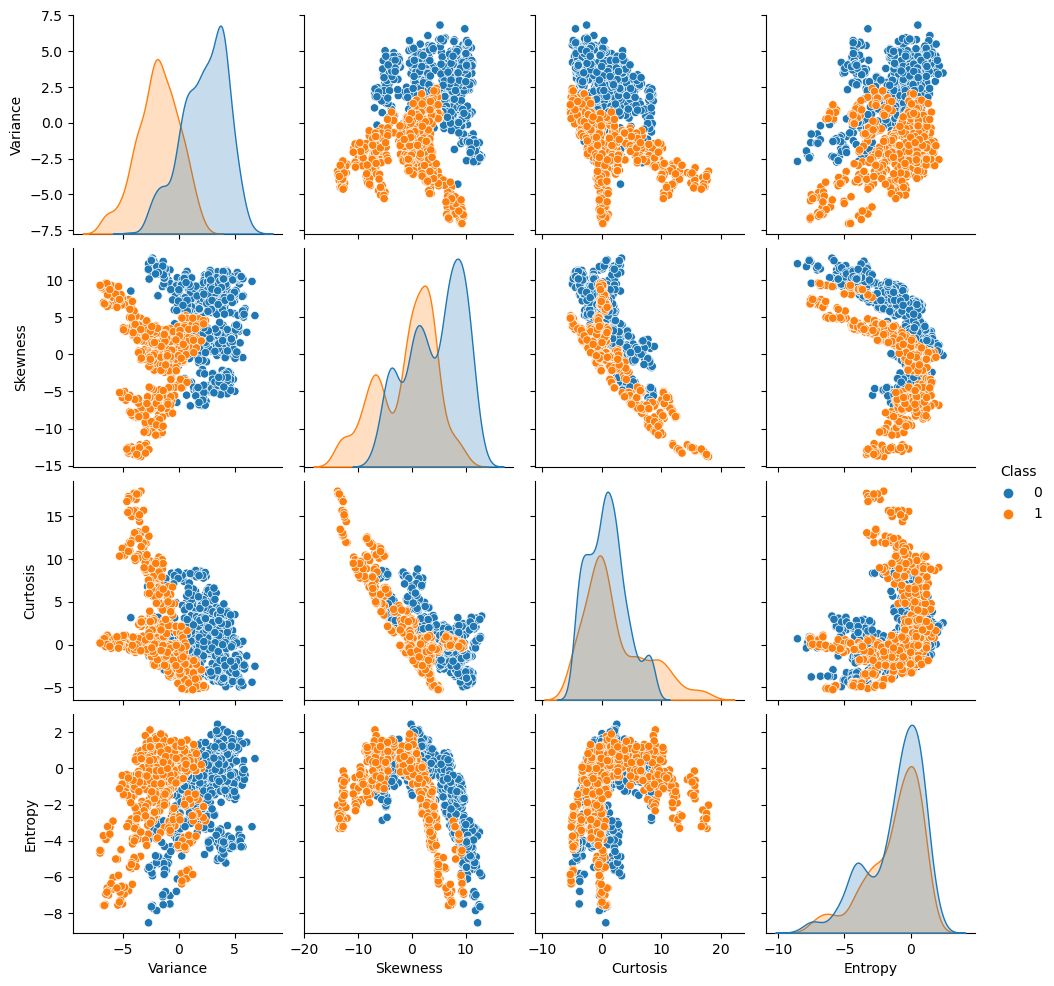

In [93]:
sns.pairplot(df, hue='Class')

<Axes: xlabel='count', ylabel='Class'>

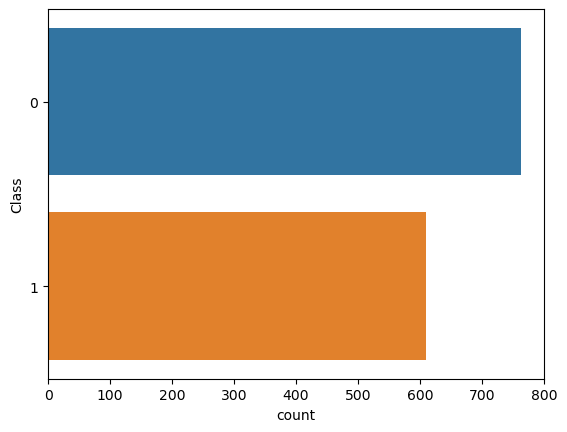

In [94]:
sns.countplot(y = df['Class'])

In [95]:
df["Class"].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

#### Separate the input and output data

In [96]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [97]:
x.shape

(1372, 4)

In [98]:
x.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

#### Scale the data

In [99]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [101]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,1372.000000,1.372000e+03,1.372000e+03,1.372000e+03
mean,0.000000,4.143106e-17,1.035777e-17,-4.919939e-17
std,1.000365,1.000365e+00,1.000365e+00,1.000365e+00
min,-2.630737,-2.675252e+00,-1.551303e+00,-3.502703e+00
25%,-0.776547,-6.188189e-01,-6.899455e-01,-5.817379e-01
50%,0.021974,6.771828e-02,-1.812706e-01,2.880644e-01
75%,0.840243,8.338757e-01,4.135174e-01,7.553713e-01
max,2.249008,1.879908e+00,3.836586e+00,1.733680e+00


#### Cross-Validation

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 0, stratify= y, test_size=0.25)

In [104]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

#### Create the model

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr = LogisticRegression()

In [107]:
lr.fit(x_train, y_train)

LogisticRegression()

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [109]:
y_pred = lr.predict(x_test)

In [110]:
acc = accuracy_score(y_test, y_pred)
acc

0.9912536443148688

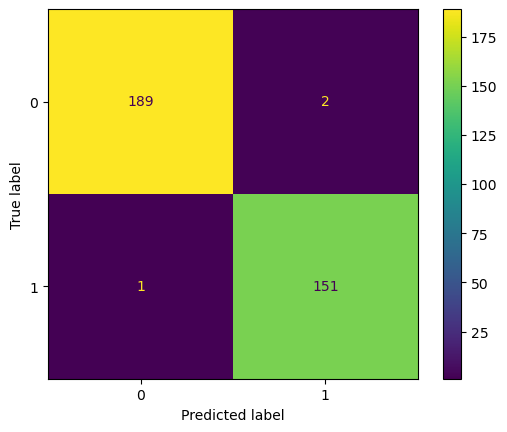

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

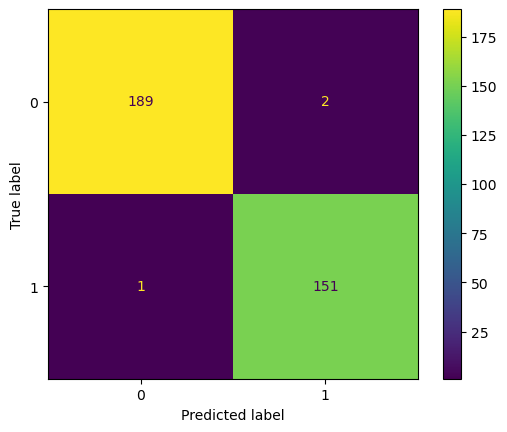

In [112]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [114]:
new = pd.concat([x.iloc[45:46,:],x.iloc[236:237,:],x.iloc[1000:1001,:]])
new

,Variance,Skewness,Curtosis,Entropy
45,-0.7869,9.5663,-3.7867,-7.5034
236,-1.3274,9.4980,2.4408,-5.2689
1000,-2.8829,3.8964,-0.1888,-1.1672


In [115]:
lr.predict(scaler.transform(new))

array([0, 0, 1])

In [117]:
y.iloc[45],y.iloc[236],y.iloc[1000]

(0, 0, 1)